In [2]:
#Fetch dataset from openml by name or dataset id.
from sklearn.datasets import fetch_openml
#Matplotlib is a low level graph plotting library in python that serves as a visualization utility.
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

mnist = fetch_openml('mnist_784')
#The digits have been size-normalized and centered in a fixed-size image
#It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
x, y = mnist['data'], mnist['target']

In [5]:
x.shape

(70000, 784)

In [6]:
y.shape

(70000,)

(-0.5, 27.5, 27.5, -0.5)

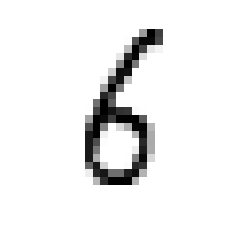

In [7]:
# Convert dataframe to Numpy array
some_digit = x.to_numpy()[36002]#to change number
some_digit_image = some_digit.reshape(28, 28)  # let's reshape to plot it

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
           interpolation='nearest')
#binary means black and white
# Interpolation is also used in Image Processing 
#when expanding an image you can estimate the pixel value with help of neighboring pixels
plt.axis('off')

In [8]:
y[36002]

'6'

(-0.5, 27.5, 27.5, -0.5)

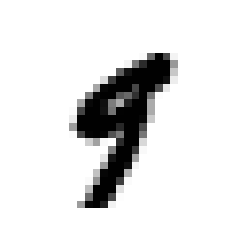

In [11]:
some_digit1 = x.to_numpy()[36000]#to chnage number
some_digit_image1 = some_digit1.reshape(28, 28)  # let's reshape to plot it

plt.imshow(some_digit_image1, cmap=matplotlib.cm.binary,
           interpolation='nearest')
plt.axis('off')

In [12]:
y[36000]

'9'

In [9]:
'''train-training numbers
test-to test the numbers'''
x_train, x_test = x[:60000], x[60000:]
y_train, y_test = y[:60000], y[60000:]

# creating 6 detector

In [13]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_6 = (y_train == 6)
y_test_6 = (y_test == 6)

In [14]:
y_train_6

0        False
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997    False
59998     True
59999    False
Name: class, Length: 60000, dtype: bool

In [15]:
y_test_6

60000    False
60001    False
60002    False
60003    False
60004    False
         ...  
69995    False
69996    False
69997    False
69998    False
69999     True
Name: class, Length: 10000, dtype: bool

In [17]:
clf = LogisticRegression(tol=0.1)#tolerance
clf.fit(x_train, y_train_6)
#0-6,true/false
example = clf.predict([some_digit])
print(example)

[ True]


In [18]:
clf.predict([some_digit])

array([ True])

In [19]:
a = cross_val_score(clf, x_train, y_train_6, cv=3, scoring="accuracy")

In [20]:
print(a.mean())

0.9843666666666667


#98%accuracy